In [46]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [47]:
ds_vlagun = pd.read_csv(r'C:\Users\Ala\Downloads\VLagun_Phys_Years3.csv')

In [61]:
X = ds_vlagun.iloc[:, 1:3].values # we only take the first two features.
y = ds_vlagun.iloc[:, -1].values    # we only take the last column

In [49]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
#use linear kernel to find accuracy support vector machine
from sklearn.svm import SVC
classifier_rbf = SVC(kernel = 'rbf', C = 0.1, gamma = 0.1)
classifier_rbf.fit(X_train, y_train)

classifier_linear = SVC(kernel = 'linear', C = 0.1, gamma = 0.1)
classifier_linear.fit(X_train, y_train)

classifier_poly = SVC(kernel = 'poly', C = 0.1, gamma = 0.1)
classifier_poly.fit(X_train, y_train)

classifier_sigmoid = SVC(kernel = 'sigmoid', C = 0.1, gamma = 0.1)
classifier_sigmoid.fit(X_train, y_train)

SVC(C=0.1, gamma=0.1, kernel='sigmoid')

In [51]:
print("Accuracy of RBF SVM classifier: ", classifier_rbf.score(X_test, y_test))
print("Accuracy of Linear SVM classifier: ", classifier_linear.score(X_test, y_test))
print("Accuracy of Poly SVM classifier: ", classifier_poly.score(X_test, y_test))
print("Accuracy of Sigmoid SVM classifier: ", classifier_sigmoid.score(X_test, y_test))

Accuracy of RBF SVM classifier:  0.8055555555555556
Accuracy of Linear SVM classifier:  0.4444444444444444
Accuracy of Poly SVM classifier:  0.5833333333333334
Accuracy of Sigmoid SVM classifier:  0.5555555555555556


C:\Users\Ala\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


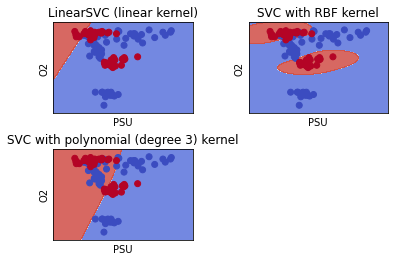

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('PSU')
    plt.ylabel('O2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()